# Machine Problem 5: Object Detection and Recognition using YOLO.

In [ ]:
!pip install tensorflow
!pip install opencv-python
!pip install opencv-python-headless
!pip install matplotlib

In [ ]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17022, done.
remote: Total 17022 (delta 0), reused 0 (delta 0), pack-reused 17022 (from 1)
Receiving objects: 100% (17022/17022), 15.62 MiB | 19.29 MiB/s, done.
Resolving deltas: 100% (11694/11694), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 25.4 MB/s eta 0:00:00


In [ ]:
import torch
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Load the YOLOv5 model (you can choose any of the available models: yolov5s, yolov5m, yolov5l, yolov5x)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # Load the small model

def detect_objects(image_path):
    # Load image
    img = cv2.imread(image_path)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    # Perform detection
    results = model(img)

    # Render results on the image
    results.render()  # Render detections on the image
    return img, results

# Example usage
image_path = '/content/traffic.jpg'  # Replace with your image path
img, results = detect_objects(image_path)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-11-2 Python-3.10.12 torch-2.5.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Number of detections: 47


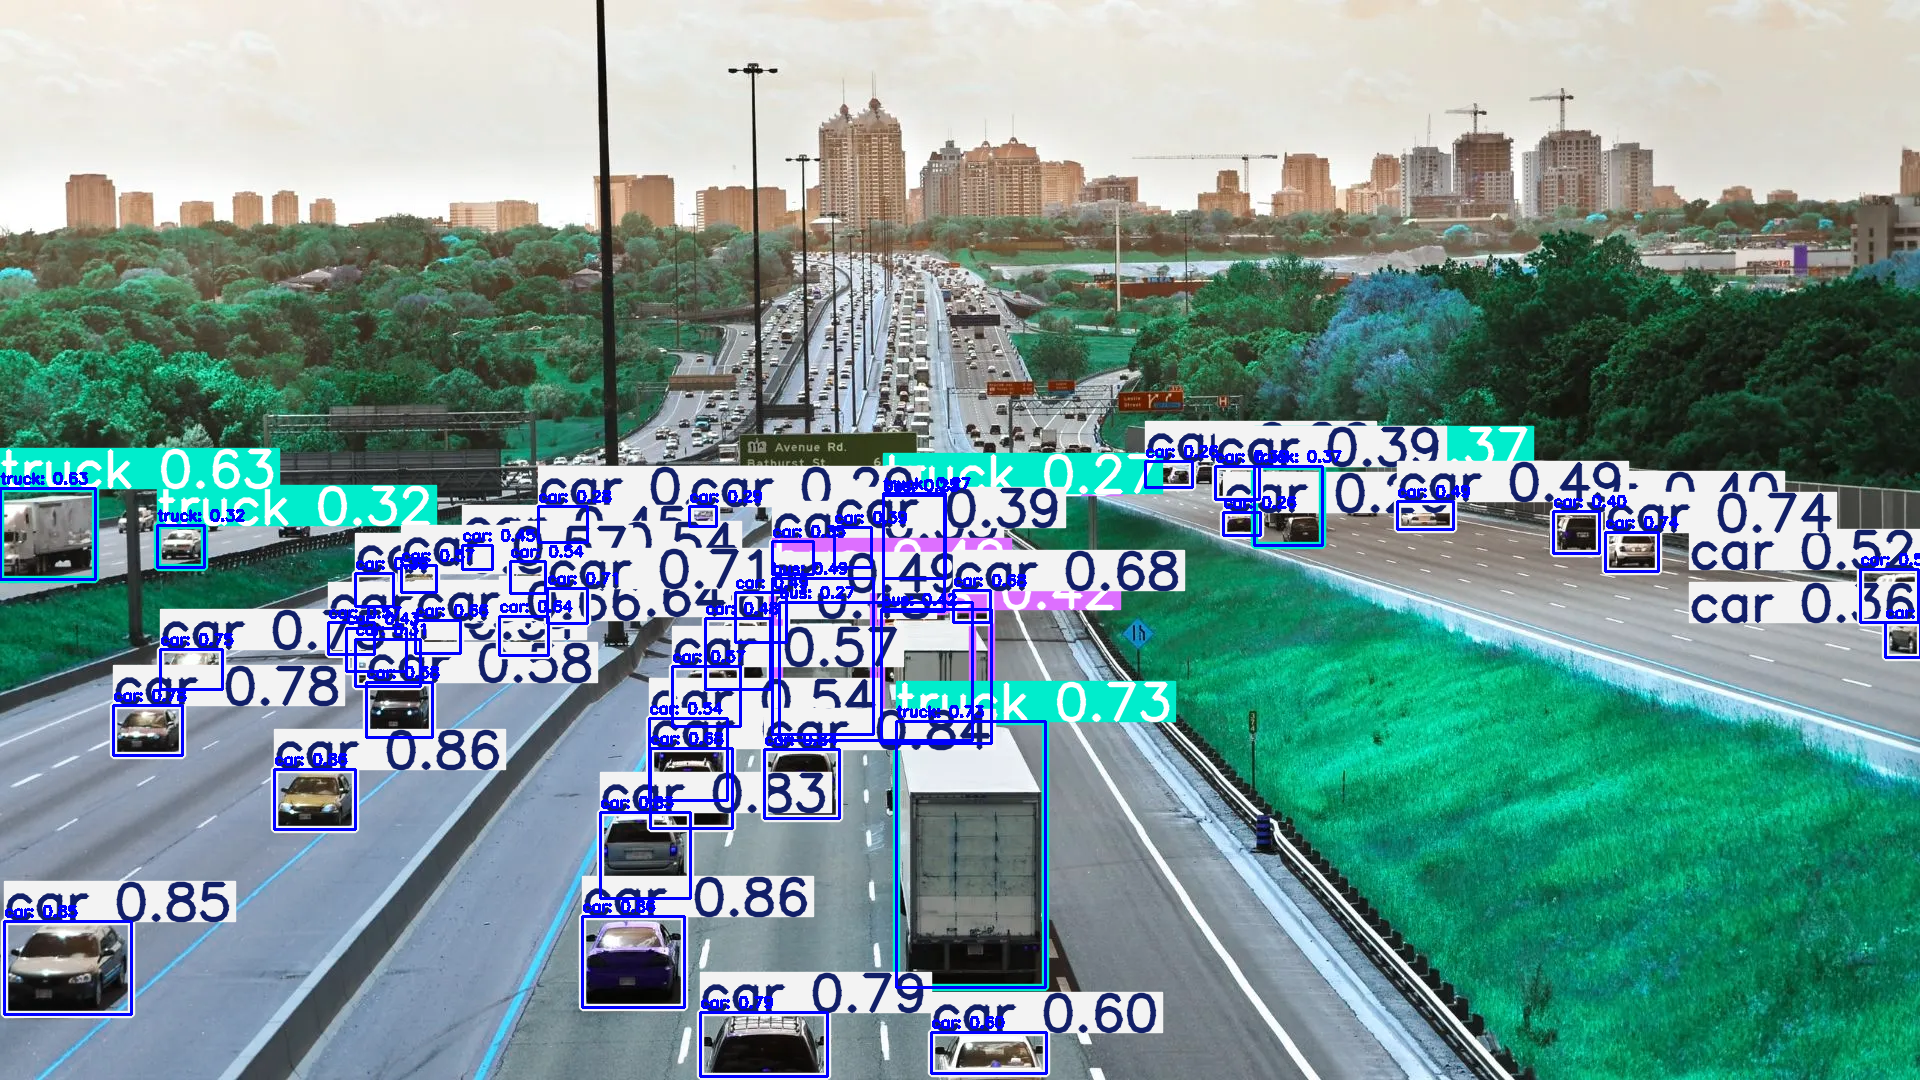

In [ ]:
# Function to visualize results
def visualize_results(image, results):
    print("Number of detections:", len(results.pred[0]))  # Debug output
    for result in results.pred[0]:
        x_min, y_min, x_max, y_max, conf, cls = result.tolist()
        label = f"{model.names[int(cls)]}: {conf:.2f}"  # Get class name and confidence
        # Draw bounding box
        cv2.rectangle(image, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (255, 0, 0), 2)
        # Put label
        cv2.putText(image, label, (int(x_min), int(y_min) - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Convert BGR to RGB for displaying with Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.imshow(image_rgb)
    plt.axis('off')  # Hide axes
    plt.show()

# Function to visualize results using OpenCV
def visualize_results_cv(image, results):
    for result in results.pred[0]:
        x_min, y_min, x_max, y_max, conf, cls = result.tolist()
        label = f"{model.names[int(cls)]}: {conf:.2f}"  # Get class name and confidence
        # Draw bounding box
        cv2.rectangle(image, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (255, 0, 0), 2)
        # Put label
        cv2.putText(image, label, (int(x_min), int(y_min) - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    cv2_imshow(image)
    cv2.waitKey(0)  # Wait until a key is pressed
    cv2.destroyAllWindows()

# Call the visualization function
visualize_results(img, results)

# Call the alternative visualization function
visualize_results_cv(img, results)

Loaded image: /content/traffic1.jpg with shape: (181, 278, 3)


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detection results for /content/traffic1.jpg: 11 objects detected


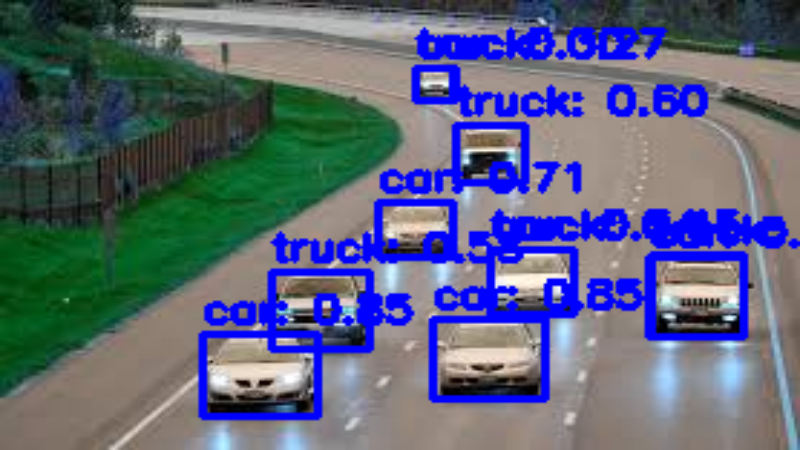

Loaded image: /content/traffic2.jpg with shape: (344, 612, 3)


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detection results for /content/traffic2.jpg: 19 objects detected


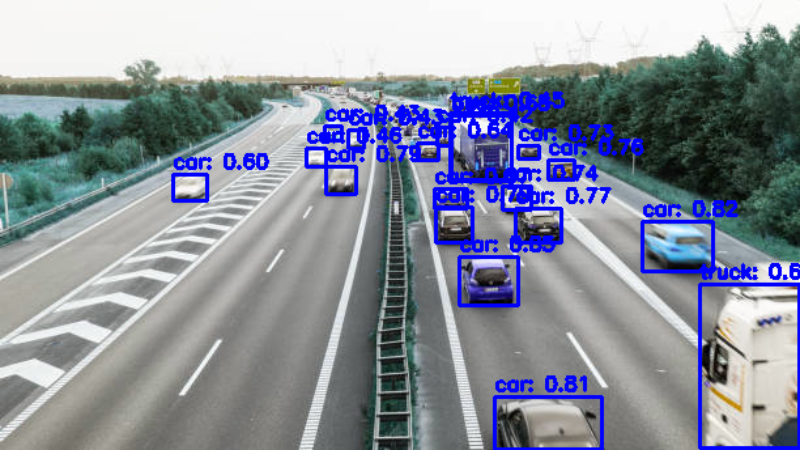

Loaded image: /content/people.jpg with shape: (667, 1000, 3)


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detection results for /content/people.jpg: 3 objects detected


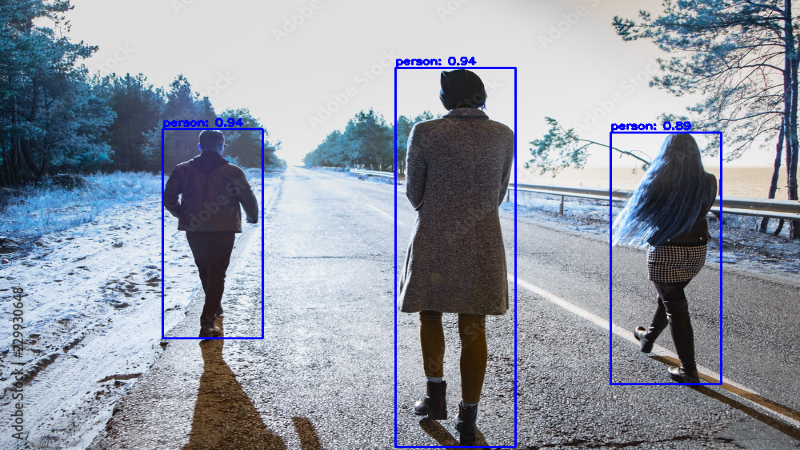

In [ ]:
# Function to visualize results with bounding boxes
def visualize_results(image, results):
    for result in results.pred[0]:
        x_min, y_min, x_max, y_max, conf, cls = result.tolist()
        label = f"{model.names[int(cls)]}: {conf:.2f}"
        cv2.rectangle(image, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (255, 0, 0), 2)
        cv2.putText(image, label, (int(x_min), int(y_min) - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    return image

# Function to resize image for display
def resize_image(image, target_size):
    return cv2.resize(image, target_size)

# Function to test model on provided images
def test_model_on_images(image_paths):
    target_size = (800, 450)

    for image_path in image_paths:
        # Load image
        img = cv2.imread(image_path)
        if img is None:
            print(f"Error loading image at {image_path}")
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        print(f"Loaded image: {image_path} with shape: {img.shape}")

        # Perform detection
        results = model(img)  # Assuming `model` is already defined and loaded
        print(f"Detection results for {image_path}: {results.pred[0].shape[0]} objects detected")

        # Visualize results
        img_with_boxes = visualize_results(img, results)

        # Resize image for display
        img_with_boxes_resized = resize_image(img_with_boxes, target_size)

        # Show the image with bounding boxes using cv2_imshow
        cv2_imshow(img_with_boxes_resized)
        cv2.waitKey(0)  # Wait for a key press to close the image window
# List of image paths
test_image_paths = ['/content/traffic1.jpg', '/content/traffic2.jpg', '/content/people.jpg']

# Call the test function
test_model_on_images(test_image_paths)

In [ ]:
import time

# Example usage with time measurement
image_path = '/content/traffic.jpg'  # Replace with the correct image filename
start_time = time.time()  # Start timer
img, results = detect_objects(image_path)
end_time = time.time()  # End timer
print(f"Detection Time: {end_time - start_time:.2f} seconds")

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detection Time: 0.35 seconds
